In [ ]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

In [ ]:
# Read clean data, prepared for machine learning
data = pd.read_csv('https://raw.githubusercontent.com/nikatnguyen/Project4/main/Resources/clean_df.csv')
data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Insufficient_Weight,Normal_Weight,...,yes.3,Always.1,Frequently.1,Sometimes.1,no.5,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,...,0,0,0,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,0,...,0,0,0,1,0,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,0,...,0,0,0,1,0,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,0,...,0,0,0,1,0,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Preparing the data for Scikit-learn technique
X = data.drop(columns=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
                     'Overweight_Level_I', 'Overweight_Level_II', 'Insufficient_Weight', 'Normal_Weight'])
y = np.argmax(data[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']].values, axis=1)


In [ ]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions and Evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9314420803782506
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.82      0.87      0.84        62
           2       0.86      0.86      0.86        56
           3       0.92      0.94      0.93        50
           4       0.99      0.91      0.95        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



In [ ]:
# Prepare the data for K-Fold
X = data.drop(columns=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
                     'Overweight_Level_I', 'Overweight_Level_II', 'Insufficient_Weight', 'Normal_Weight'])
y = np.argmax(data[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']].values, axis=1)

In [ ]:
# Define a pipeline that includes scaling and the classifier
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))

In [ ]:
# Define the K-Fold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Perform K-Fold CV and calculate accuracy
scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

In [ ]:
print(f'Accuracy scores for each fold are: {scores}')
print(f'Mean CV Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation of CV Accuracy: {np.std(scores):.4f}')

Accuracy scores for each fold are: [0.94326241 0.93601896 0.94075829 0.93364929 0.96208531]
Mean CV Accuracy: 0.9432
Standard Deviation of CV Accuracy: 0.0101


In [ ]:
# Conduct GridSearchCV to compare parameters within scikit-learn and extract best parameters and scores.
# Example dataset
X, y = load_iris(return_X_y=True)

In [ ]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Model initialization
model = RandomForestClassifier(random_state=42)

In [ ]:
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Extracting the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
# Print Best parameters and scores
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
Best Score: 0.9666666666666668


In [ ]:
# Read original data for matplotlib visuals
original_data = pd.read_csv('https://raw.githubusercontent.com/nikatnguyen/Project4/main/Resources/ObesityDataSet.csv')
original_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


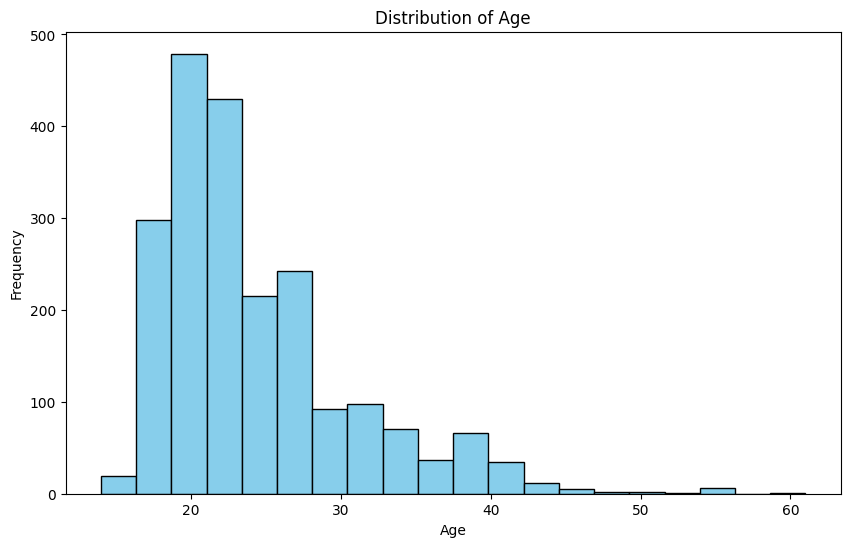

In [ ]:
# Plotting histograms for Age, Height, and Weight
plt.figure(figsize=(10, 6))
plt.hist(original_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

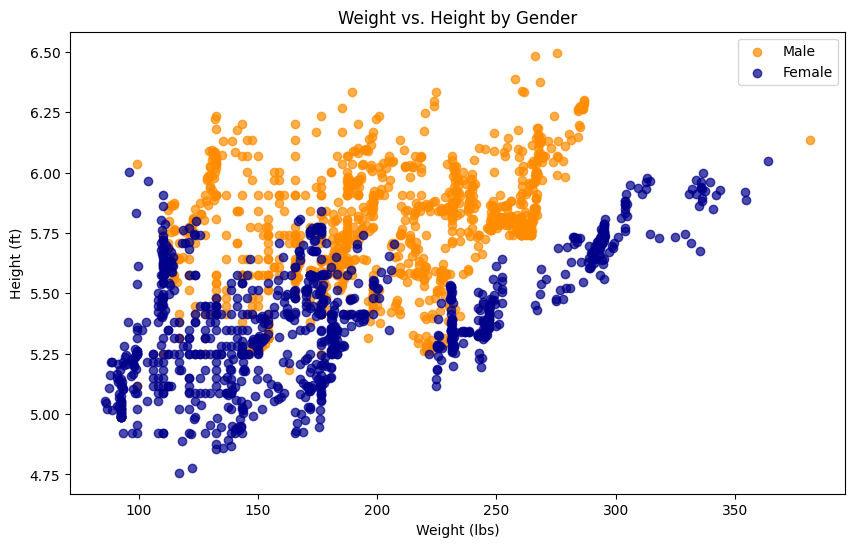

In [ ]:
# Conversion factors
m_to_ft = 3.28084  # Meters to feet
kg_to_lb = 2.20462  # Kilograms to pounds

# Convert height from meters to feet and weight from kilograms to pounds
data['Height_ft'] = data['Height'] * m_to_ft
data['Weight_lbs'] = data['Weight'] * kg_to_lb

# Assuming your dataset has 'Male' and 'Female' columns for gender as one-hot encoding
data['Gender'] = data['Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Creating the scatter plot with distinct colors
plt.figure(figsize=(10, 6))
colors = {'Male': 'darkorange', 'Female': 'darkblue'}  # More distinct colors
for gender in ['Male', 'Female']:
    subset = data[data['Gender'] == gender]
    # Use the converted units (ft and lbs) for plotting
    plt.scatter(subset['Weight_lbs'], subset['Height_ft'], color=colors[gender], label=gender, alpha=0.7)

plt.title('Weight vs. Height by Gender')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (ft)')
plt.legend()
plt.show()